### **CSFL PBL : 31,44,51**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-fuzzy
import skfuzzy as fuzz

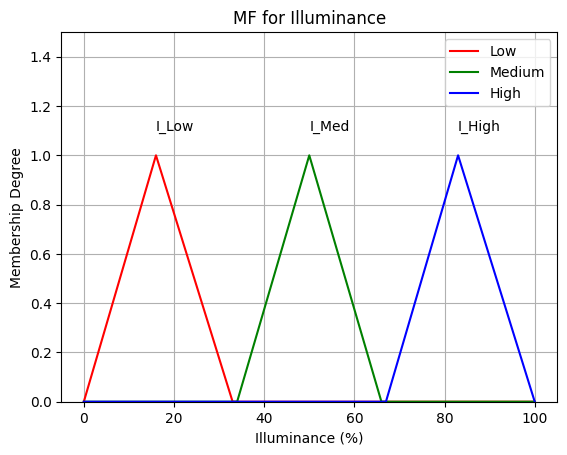

In [ ]:
#ILLUMINANCE


range = np.arange(0, 101, 1)


i_low = fuzz.trimf(range, [0, 16, 33])
i_med = fuzz.trimf(range, [34, 50, 66])
i_high = fuzz.trimf(range, [67, 83, 100])


fig,a = plt.subplots()
a.plot(range, i_low, 'r', linewidth=1.5, label='Low')
a.plot(range, i_med, 'g', linewidth=1.5, label='Medium')
a.plot(range, i_high, 'b', linewidth=1.5, label='High')

plt.title('MF for Illuminance')
plt.xlabel('Illuminance (%)')
a.set_ylim(0,1.5)
plt.ylabel('Membership Degree')

plt.text(16,1.1,'I_Low')
plt.text(50,1.1,'I_Med')
plt.text(83,1.1,'I_High')

plt.legend()
plt.grid()
plt.show()

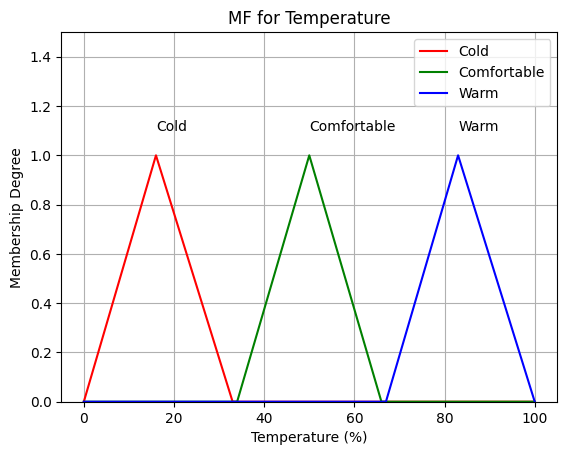

In [ ]:

# TEMPERATURE

range = np.arange(0, 101, 1)

t_cold = fuzz.trimf(range, [0, 16, 33])
t_comfortable = fuzz.trimf(range, [34, 50, 66])
t_warm = fuzz.trimf(range, [67, 83, 100])

fig, b = plt.subplots()
b.plot(range, t_cold, 'r', linewidth=1.5, label='Cold')
b.plot(range, t_comfortable, 'g', linewidth=1.5, label='Comfortable')
b.plot(range, t_warm, 'b', linewidth=1.5, label='Warm')

plt.title('MF for Temperature')
plt.xlabel('Temperature (%)')
b.set_ylim(0, 1.5)
plt.ylabel('Membership Degree')

plt.text(16, 1.1, 'Cold')
plt.text(50, 1.1, 'Comfortable')
plt.text(83, 1.1, 'Warm')

plt.legend()
plt.grid()
plt.show()

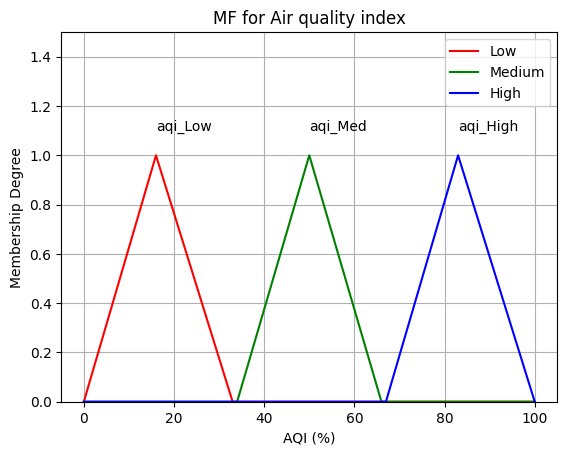

In [42]:
#  AIR QUALITY INDEX (AQI)

range = np.arange(0, 101, 1)


aq_low = fuzz.trimf(range, [0, 16, 33])
aq_med = fuzz.trimf(range, [34, 50, 66])
aq_high = fuzz.trimf(range, [67, 83, 100])


fig,a = plt.subplots()
a.plot(range, aq_low, 'r', linewidth=1.5, label='Low')
a.plot(range, aq_med, 'g', linewidth=1.5, label='Medium')
a.plot(range, aq_high, 'b', linewidth=1.5, label='High')

plt.title('MF for Air quality index')
plt.xlabel('AQI (%)')
a.set_ylim(0,1.5)
plt.ylabel('Membership Degree')

plt.text(16,1.1,'aqi_Low')
plt.text(50,1.1,'aqi_Med')
plt.text(83,1.1,'aqi_High')

plt.legend()
plt.grid()
plt.show()

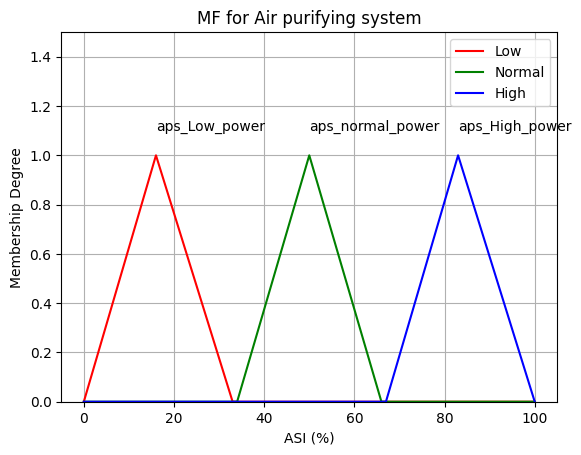

In [57]:
#  AIR PURIFYING SYSTEM (APS)

range = np.arange(0, 101, 1)


as_low = fuzz.trimf(range, [0, 16, 33])
as_normal = fuzz.trimf(range, [34, 50, 66])
as_high = fuzz.trimf(range, [67, 83, 100])


fig,a = plt.subplots()
a.plot(range, as_low, 'r', linewidth=1.5, label='Low')
a.plot(range, as_normal, 'g', linewidth=1.5, label='Normal')
a.plot(range, as_high, 'b', linewidth=1.5, label='High')

plt.title('MF for Air purifying system')
plt.xlabel('ASI (%)')
a.set_ylim(0,1.5)
plt.ylabel('Membership Degree')

plt.text(16,1.1,'aps_Low_power')
plt.text(50,1.1,'aps_normal_power')
plt.text(83,1.1,'aps_High_power')

plt.legend()
plt.grid()
plt.show()

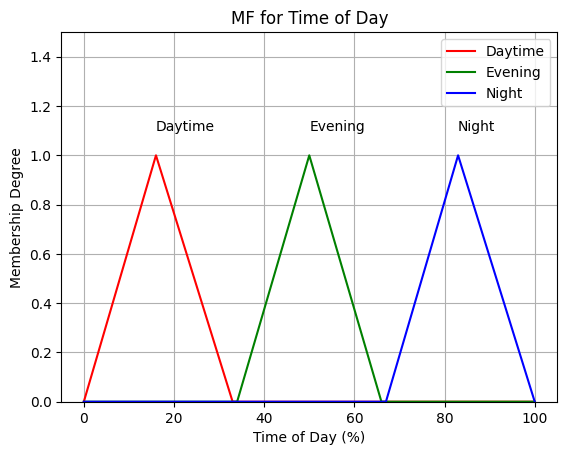

In [ ]:

# TIME OF DAY

range = np.arange(0, 101, 1)

tod_daytime = fuzz.trimf(range, [0, 16, 33])
tod_evening = fuzz.trimf(range, [34, 50, 66])
tod_night = fuzz.trimf(range, [67, 83, 100])

fig, f = plt.subplots()
f.plot(range, tod_daytime, 'r', linewidth=1.5, label='Daytime')
f.plot(range, tod_evening, 'g', linewidth=1.5, label='Evening')
f.plot(range, tod_night, 'b', linewidth=1.5, label='Night')

plt.title('MF for Time of Day')
plt.xlabel('Time of Day (%)')
f.set_ylim(0, 1.5)
plt.ylabel('Membership Degree')

plt.text(16, 1.1, 'Daytime')
plt.text(50, 1.1, 'Evening')
plt.text(83, 1.1, 'Night')

plt.legend()
plt.grid()
plt.show()


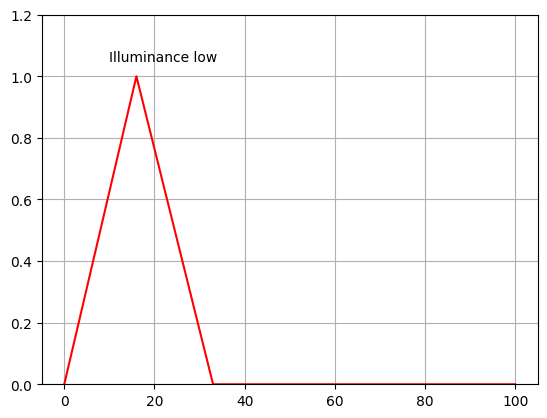

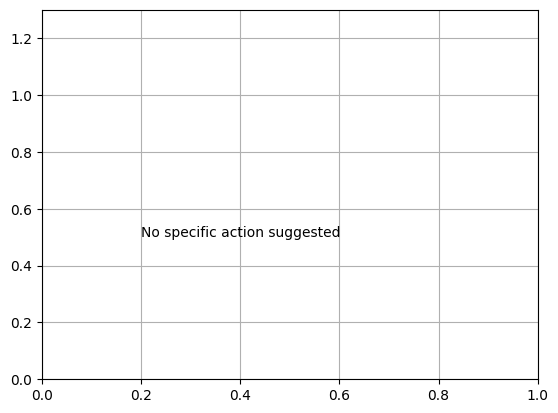

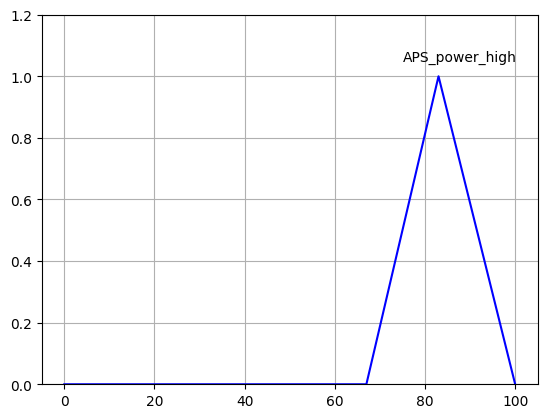

In [65]:

i_value = 90
t_value = 9
aqi_value = 90
tod_value = 9


i_low_degree = fuzz.interp_membership(range, i_low, i_value)
i_med_degree = fuzz.interp_membership(range, i_med, i_value)
i_high_degree = fuzz.interp_membership(range, i_high, i_value)

t_cold_degree = fuzz.interp_membership(range, t_cold, t_value)
t_comfortable_degree = fuzz.interp_membership(range, t_comfortable, t_value)
t_warm_degree = fuzz.interp_membership(range, t_warm, t_value)

aq_low_degree = fuzz.interp_membership(range,aq_low,aqi_value)
aq_med_degree = fuzz.interp_membership(range,aq_med,aqi_value)
aq_high_degree = fuzz.interp_membership(range,aq_high,aqi_value)

tod_daytime_degree = fuzz.interp_membership(range, tod_daytime, tod_value)
tod_evening_degree = fuzz.interp_membership(range, tod_evening, tod_value)
tod_night_degree = fuzz.interp_membership(range, tod_night, tod_value)


rule1_1 = min(i_high_degree, tod_daytime_degree)  # IF Illuminance is high AND TOD is daytime THEN i_low
rule1_2 = min(i_low_degree,tod_night_degree)      # IF Illumninance is low and TOD is night THEN i_high
rule1_3 = min(i_low_degree,tod_evening_degree)    # IF Illuminance IS Low AND time of evening THEN i_med

if rule1_1>0:
  fig,a = plt.subplots()
  a.plot(i_low,'r')
  plt.text(10,1.05,'Illuminance low')
  a.set_ylim(0,1.2)
elif rule1_2>0:
  fig,a = plt.subplots()
  a.plot(i_high,'b')
  plt.text(75,1.05,'Illuminance high')
  a.set_ylim(0,1.2)
elif rule1_3>0:
  fig,a=plt.subplots()
  a.plot(i_med,'b')
  plt.text(45,1.05,'Illuminance Medium')
  a.set_ylim(0,1.2)
else:
  fig,a=plt.subplots()
  a.set_ylim(0,1.3)
  plt.text(0.2,0.5,"No specific action suggested")

plt.grid()

rule2_1 = min(t_cold_degree, tod_night_degree)  # IF Temperature IS Cold AND Time of Day IS Night THEN t_warm
rule2_2 = min(t_warm_degree,tod_daytime_degree)      # IF Temperature IS Warm AND Time of Day IS Daytime THEN t_cold
rule2_3 = min(t_comfortable_degree,tod_evening_degree)    # IF Temperature IS Comfortable AND Time of Day IS Evening THEN t_Comfort

if rule2_1>0:
  fig,a = plt.subplots()
  a.plot(t_warm,'b')
  plt.text(70,1.05,'Temperature warm')
  a.set_ylim(0,1.2)
elif rule2_2>0:
  fig,a = plt.subplots()
  a.plot(t_cold,'r')
  plt.text(10,1.05,'Temperature cold')
  a.set_ylim(0,1.2)
elif rule2_3>0:
  fig,a=plt.subplots()
  a.plot(t_comfortable,'g')
  plt.text(45,1.05,'Temperature comfortable')
  a.set_ylim(0,1.2)
else:
  fig,a=plt.subplots()
  a.set_ylim(0,1.3)
  plt.text(0.2,0.5,"No specific action suggested")

plt.grid()

if 0<=aqi_value and aqi_value<=33:            #IF AQI IS Low THEN APS_power_low
  fig,a = plt.subplots()
  a.plot(as_low,'r')
  a.set_ylim(0,1.2)
  plt.text(10,1.05,'APS_power_low')
elif 34<=aqi_value and aqi_value<=66:
  fig,a = plt.subplots()
  a.plot(as_normal,'g')
  a.set_ylim(0,1.2)
  plt.text(45,1.05,'APS_power_normal')       #IF AQI IS Medium THEN APS_power_normal
elif 67<=aqi_value and aqi_value<=100:
  fig,a = plt.subplots()
  a.plot(as_high,'b')
  a.set_ylim(0,1.2)
  plt.text(75,1.05,'APS_power_high')   #IF AQI IS High THEN APS_power_high
else:
  fig,a=plt.subplots()
  a.set_ylim(0,1.3)
  plt.text(0.2,0.5,"No specific action suggested")

plt.grid()